In [57]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [14]:
df=pd.read_csv('Datasets/train_u6lujuX_CVtuZ9i.csv')


In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

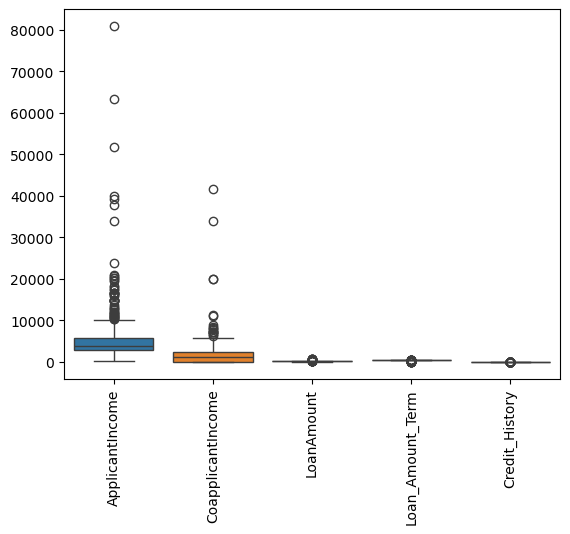

In [19]:
#checking outliers
plt.xticks(rotation=90)
sns.boxplot(df)

In [20]:
# filling missing values
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    elif df[i].dtype=='int64' or df[i].dtype=='float64':
        df[i]=df[i].fillna(df[i].median())

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      502
Female    112
Name: count, dtype: int64


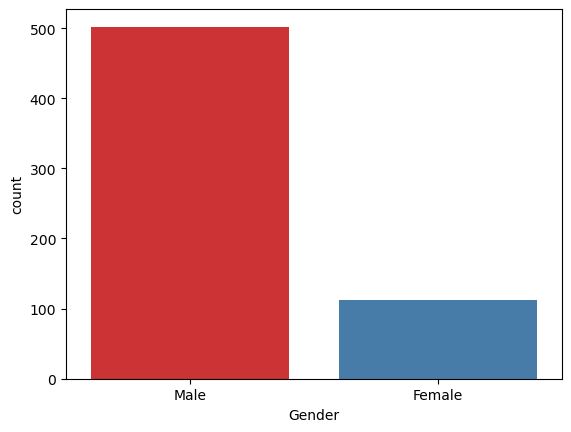

Married
Yes    401
No     213
Name: count, dtype: int64


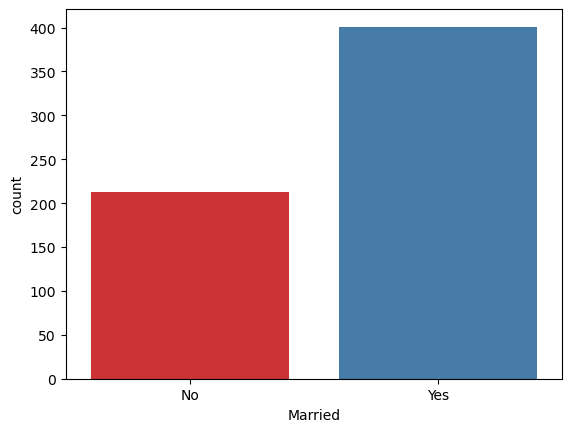

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


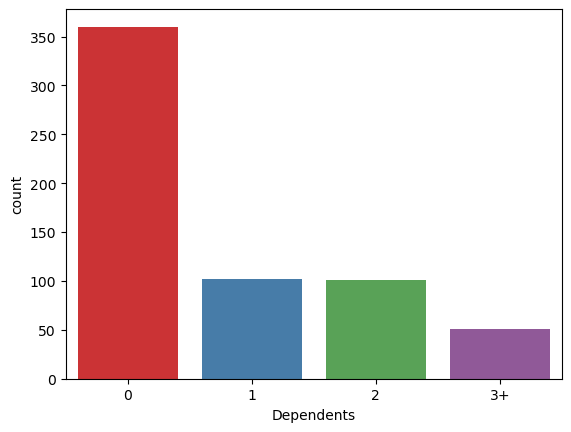

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


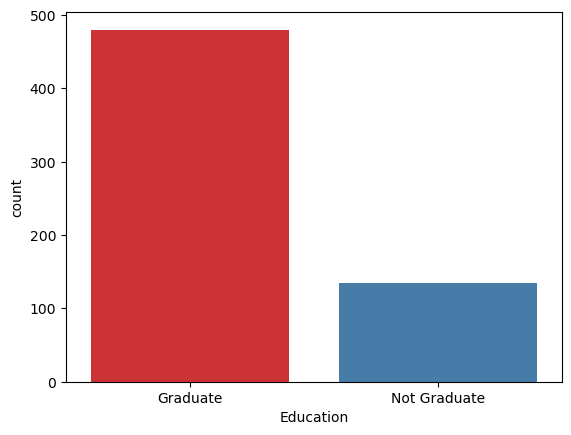

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


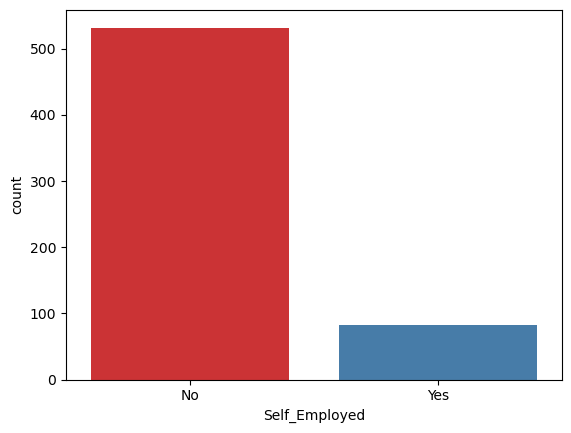

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


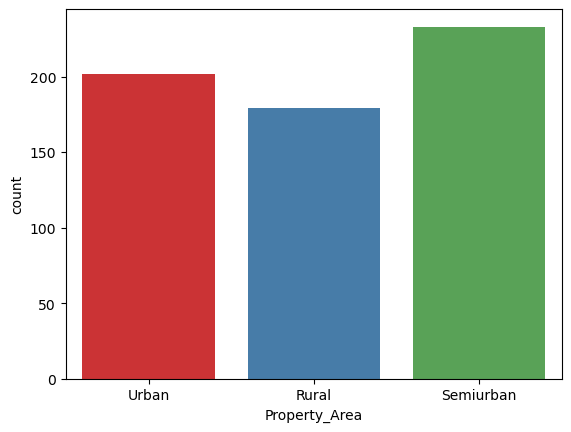

Loan_Status
Y    422
N    192
Name: count, dtype: int64


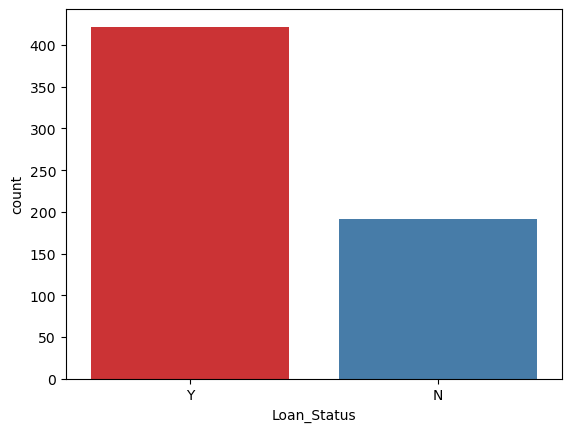

In [22]:
for i in df.columns:
    if i=='Loan_ID':
        continue
    if df[i].dtype=='object':
        print(df[i].value_counts())
        sns.countplot(x=i,data=df,palette='Set1')
        plt.show()

<Axes: >

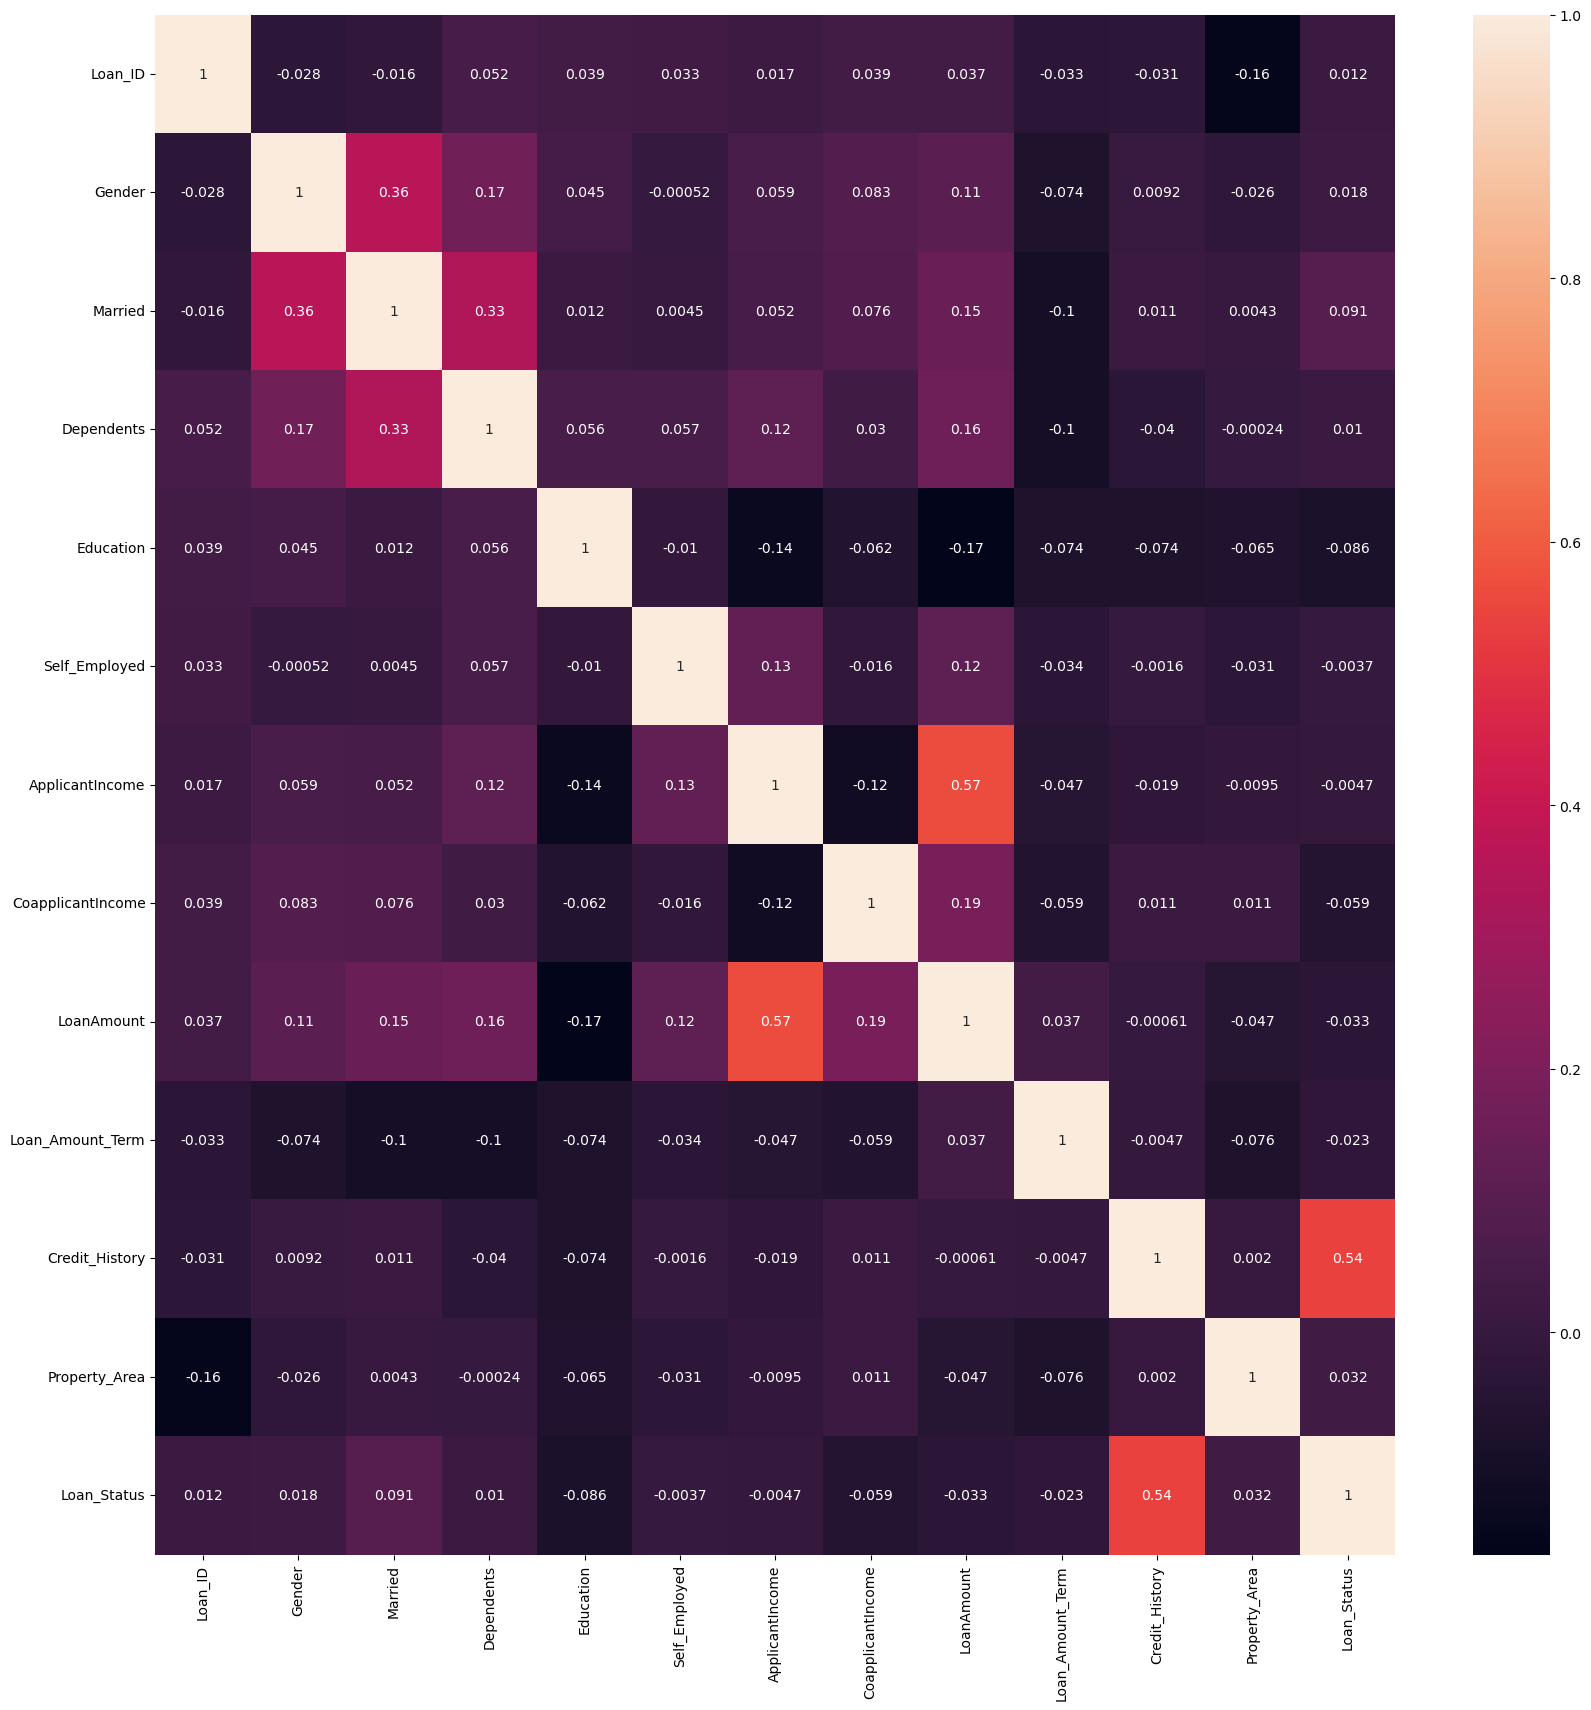

In [30]:
encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=encoder.fit_transform(df[i])
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [31]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

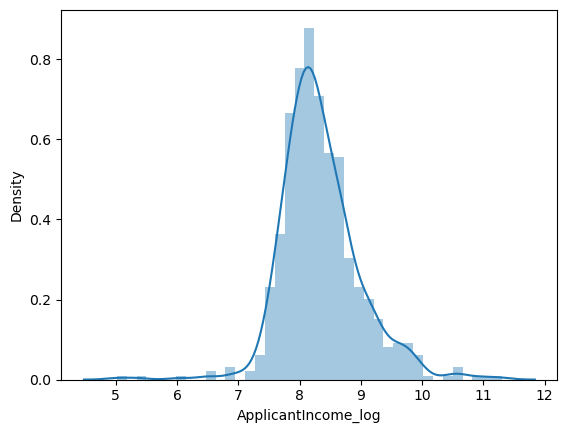

In [34]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_log'])

In [36]:
df['LoanAmount_log']=np.log(df['LoanAmount']+1)
df['Total_Income_log']=np.log(df['Total_income']+1)
df['LoanAmountTerm_log']=np.log(df['Loan_Amount_Term']+1)

In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'ApplicantIncome_log', 'LoanAmount_log',
       'Total_Income_log', 'LoanAmountTerm_log'],
      dtype='object')

In [43]:
 cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Loan_ID']
df.drop(columns=cols,axis=0,inplace=True)

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Total_Income_log,LoanAmountTerm_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,8.674197,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,8.714732,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,8.006701,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,8.505525,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,8.699681,5.888878


In [47]:
x=df.drop(columns=['Loan_Status'],axis=0)
y=df['Loan_Status']


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('Cross validation:',cross_val_score(model,x,y,cv=5).mean()*100,'%')

Accuracy: 78.86178861788618 %
Cross validation: 80.9462881514061 %


In [53]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred2)*100,'%')
print('Cross validation:',cross_val_score(model2,x,y,cv=5).mean()*100,'%')

Accuracy: 69.91869918699187 %
Cross validation: 70.68505930960949 %


In [54]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred3)*100,'%')


Accuracy: 78.04878048780488 %


In [56]:
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred4)*100,'%')
print('Cross validation:',cross_val_score(model4,x,y,cv=5).mean()*100,'%')

Accuracy: 72.35772357723577 %
Cross validation: 75.56977209116353 %


In [58]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Confusion Matrix = " , confusion_matrix(y_actual, y_predicted))
    print("Classification Report = " , classification_report(y_actual, y_predicted))

In [59]:
models=[model,model2,model3,model4]
for i in models:
    print(generate_model_report(y_test,i.predict(x_test)))

Accuracy =  0.7886178861788617
Confusion Matrix =  [[18 25]
 [ 1 79]]
Classification Report =                precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

None
Accuracy =  0.6991869918699187
Confusion Matrix =  [[21 22]
 [15 65]]
Classification Report =                precision    recall  f1-score   support

           0       0.58      0.49      0.53        43
           1       0.75      0.81      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.69      0.70      0.69       123

None
Accuracy =  0.7804878048780488
Confusion Matrix =  [[18 25]
 [ 2 78]]
Classification Report =                precision    recall  f1-score   suppo

In [60]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [62]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

df_sm=pd.concat([x_sm,y_sm],axis=1)

In [63]:
df_sm

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,LoanAmount_log,Total_Income_log,LoanAmountTerm_log,Loan_Status
0,1,0,0,0,0,1.0,2,8.674197,4.859812,8.674197,5.888878,1
1,1,1,1,0,0,1.0,0,8.430327,4.859812,8.714732,5.888878,0
2,1,1,0,0,1,1.0,2,8.006701,4.204693,8.006701,5.888878,1
3,1,1,0,1,0,1.0,2,7.857094,4.795791,8.505525,5.888878,1
4,1,0,0,0,0,1.0,2,8.699681,4.955827,8.699681,5.888878,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,0,0,0,0,1.0,1,7.845463,4.315126,8.698973,4.566621,0
840,1,0,0,0,0,0.0,1,9.668504,5.341507,9.668504,5.888878,0
841,1,1,0,0,0,0.0,2,7.662185,4.625779,8.196413,5.888878,0
842,1,1,0,0,0,0.0,2,7.613080,4.302485,8.041411,5.888878,0


In [64]:
y_sm.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [66]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('Cross validation:',cross_val_score(model,x_sm,y_sm,cv=5).mean()*100,'%')


Accuracy: 69.23076923076923 %
Cross validation: 71.33065652296422 %


In [67]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred2)*100,'%')
print('Cross validation:',cross_val_score(model2,x_sm,y_sm,cv=5).mean()*100,'%')


Accuracy: 75.14792899408283 %
Cross validation: 75.5938292476754 %


In [68]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred3)*100,'%')
print('Cross validation:',cross_val_score(model3,x_sm,y_sm,cv=5).mean()*100,'%')


Accuracy: 77.51479289940828 %
Cross validation: 81.63778529163143 %


In [69]:
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred4)*100,'%')
print('Cross validation:',cross_val_score(model4,x_sm,y_sm,cv=5).mean()*100,'%')


Accuracy: 70.41420118343196 %
Cross validation: 72.51056635672019 %


In [70]:
for i in models:
    print(generate_model_report(y_test,i.predict(x_test)))

Accuracy =  0.6863905325443787
Confusion Matrix =  [[43 51]
 [ 2 73]]
Classification Report =                precision    recall  f1-score   support

           0       0.96      0.46      0.62        94
           1       0.59      0.97      0.73        75

    accuracy                           0.69       169
   macro avg       0.77      0.72      0.68       169
weighted avg       0.79      0.69      0.67       169

None
Accuracy =  0.8047337278106509
Confusion Matrix =  [[65 29]
 [ 4 71]]
Classification Report =                precision    recall  f1-score   support

           0       0.94      0.69      0.80        94
           1       0.71      0.95      0.81        75

    accuracy                           0.80       169
   macro avg       0.83      0.82      0.80       169
weighted avg       0.84      0.80      0.80       169

None
Accuracy =  0.8106508875739645
Confusion Matrix =  [[63 31]
 [ 1 74]]
Classification Report =                precision    recall  f1-score   suppo